# Walkability

Factors Considered:
* Walk to work: 35%
* Bike to work: 25%
* Population density: 15%

1. Download data from https://factfinder.census.gov/bkmk/table/1.0/en/ACS/17_5YR/DP03/
![American Community Survey](images/AmericanCommunitySurvey.png "Title")

* HC01_VC27: Estimate; COMMUTING TO WORK - Workers 16 years and over
* HC01_VC31: Estimate; COMMUTING TO WORK - Workers 16 years and over - Walked
* HC02_VC31: Margin of Error; COMMUTING TO WORK - Workers 16 years and over - Walked
* HC03_VC31: Percent; COMMUTING TO WORK - Workers 16 years and over - Walked

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/ACS_17_5YR_DP03/ACS_17_5YR_DP03_with_Ann.csv', na_values='-')

/mnt/c/Users/isaac/Dropbox/2019Spring/SpatialComputing/spatial-project/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,3,4,5,7,8,9,11,12,13,15,16,17,19,20,21,23,24,25,27,28,29,31,32,33,37,39,40,41,43,44,45,47,48,49,51,52,53,55,56,57,59,60,61,63,64,65,67,68,69,71,72,73,75,76,77,79,80,81,83,84,85,87,88,89,91,92,93,95,96,97,103,104,105,107,108,109,111,112,113,115,116,117,119,120,121,123,124,125,127,128,129,131,132,133,135,136,137,139,140,141,143,144,145,147,148,149,151,152,153,155,156,157,159,160,161,163,164,165,167,168,169,171,172,173,175,176,177,179,180,181,183,184,185,187,188,189,191,192,193,195,196,197,199,200,201,203,204,205,207,208,209,211,212,213,215,216,217,219,220,221,223,224,225,227,228,229,231,232,233,235,236,237,239,240,241,243,244,245,247,255,256,257,263,264,265,271,272,273,279,280,281,287,288,289,295,296,297,299,300,301,303,304,305,307,308,309,311,312,313,315,316,317,319,320,321,323,324,325,327,328,329,331,332,333,335,336,337,3

In [4]:
df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC178,HC04_VC178,HC01_VC179,HC02_VC179,HC03_VC179,HC04_VC179,HC01_VC180,HC02_VC180,HC03_VC180,HC04_VC180
0,Id,Id2,Geography,Estimate; EMPLOYMENT STATUS - Population 16 ye...,Margin of Error; EMPLOYMENT STATUS - Populatio...,Percent; EMPLOYMENT STATUS - Population 16 yea...,Percent Margin of Error; EMPLOYMENT STATUS - P...,Estimate; EMPLOYMENT STATUS - Population 16 ye...,Margin of Error; EMPLOYMENT STATUS - Populatio...,Percent; EMPLOYMENT STATUS - Population 16 yea...,...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error; PERCENTAGE OF FAMILIES AND PE...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error; PERCENTAGE OF FAMILIES AND PE...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...
1,8600000US60002,60002,ZCTA5 60002,19277,396,19277,(X),13141,469,68.2,...,7.6,3.4,(X),(X),7.6,2.4,(X),(X),15.3,3.0
2,8600000US60004,60004,ZCTA5 60004,40713,732,40713,(X),27449,689,67.4,...,4.8,1.6,(X),(X),3.0,1.0,(X),(X),14.2,2.8
3,8600000US60005,60005,ZCTA5 60005,24672,774,24672,(X),16825,681,68.2,...,12.0,3.3,(X),(X),4.4,1.7,(X),(X),18.2,3.5
4,8600000US60007,60007,ZCTA5 60007,28028,488,28028,(X),19195,527,68.5,...,4.0,1.8,(X),(X),3.2,1.4,(X),(X),11.6,2.9


In [22]:
commuting_df = df.drop(0)
commuting_df.index = commuting_df['GEO.id2']
commuting_df = commuting_df[['HC01_VC27', 'HC01_VC31', 'HC02_VC31', 'HC03_VC31']]
commuting_df = commuting_df.rename(index=str, columns={"HC01_VC31": "walked_est",
                                                       'HC02_VC31': 'walked_moe',
                                                       'HC03_VC31': "walked_pctl"})
commuting_df = commuting_df.astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b34a91b38>,
      dtype=object)

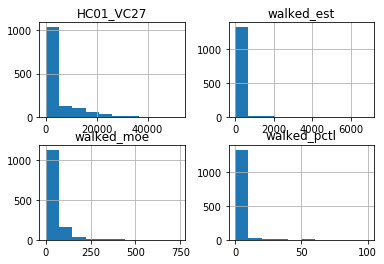

In [23]:
commuting_df.hist()

In [33]:
def grade(z_score):
    if z_score >= 1.96:
        return 'A+'
    elif z_score >= 1.28:
        return 'A'
    elif z_score >= 0.84:
        return 'A-'
    elif z_score >= 0.44:
        return 'B+'
    elif z_score >= 0:
        return 'B'
    elif z_score >= -0.44:
        return 'B-'
    elif z_score >= -0.84:
        return 'C+'
    elif z_score >= -1.28:
        return 'C'
    elif z_score >= -1.96:
        return 'C-'
    elif z_score >= -2.25:
        return 'D+'
    elif z_score >= -2.25:
        return 'D'
    elif z_score >= -2.50:
        return 'D-'
    return 'F'

commuting_df['walked_z_score'] = (commuting_df.walked_pctl - commuting_df.walked_pctl.mean()) / commuting_df.walked_pctl.std()
commuting_df['grade'] = commuting_df['walked_z_score'].apply(grade)
# commuting_df.walked_z_score

In [34]:
commuting_df

,HC01_VC27,walked_est,walked_moe,walked_pctl,walked_z_score,grade
GEO.id2,,,,,,
60002,12056.0,110.0,55.0,0.9,-0.287348,B-
60004,25994.0,234.0,93.0,0.9,-0.287348,B-
60005,15528.0,344.0,143.0,2.2,-0.074097,B-
60007,17846.0,138.0,96.0,0.8,-0.303752,B-
60008,11011.0,189.0,116.0,1.7,-0.156117,B-
60010,21173.0,184.0,93.0,0.9,-0.287348,B-
60012,5863.0,17.0,16.0,0.3,-0.385771,B-
60013,13684.0,71.0,56.0,0.5,-0.352964,B-
60014,25732.0,167.0,74.0,0.6,-0.336560,B-
